### (C) Is there a significant difference between voter’s choice of the voting channel (that is, if they decide to vote either online or in person) depending on their demographic attributes recorded in the survey?

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'datasets/private_dataF.xlsx'  # Update this path if necessary
df = pd.read_excel(file_path, engine='openpyxl')

# Calculate age from dob
df['age'] = df['dob'].apply(lambda x: datetime.now().year - x.year)

# Create age categories
def categorize_age(age):
    if age < 30:
        return 'Under 30'
    elif 30 <= age <= 50:
        return '30-50'
    elif 50 < age <= 70:
        return '50-70'
    else:
        return '70+'

df['age_category'] = df['age'].apply(categorize_age)

df['original_zip'] = df['zip']

# Function to convert categorical data to numeric
def encode_categories(column):
    return pd.Categorical(df[column]).codes

# Encode categorical variables for statistical analysis
df['sex_encoded'] = encode_categories('sex')
df['marital_status_encoded'] = encode_categories('marital_status')
df['education_encoded'] = encode_categories('education')
df['citizenship_encoded'] = encode_categories('citizenship')
df['age_category_encoded'] = encode_categories('age_category')
df['zip'] = encode_categories('zip')

# ---- Chi-Square Tests for Categorical Variables ----
# Gender vs. Evote
contingency_table_sex_evote = pd.crosstab(df['sex'], df['evote'])
chi2_sex, p_value_sex_evote, _, _ = chi2_contingency(contingency_table_sex_evote)

# Marital Status vs. Evote
contingency_table_marital_evote = pd.crosstab(df['marital_status'], df['evote'])
chi2_marital, p_value_marital_evote, _, _ = chi2_contingency(contingency_table_marital_evote)

# Citizenship vs. Evote
contingency_table_citizenship_evote = pd.crosstab(df['citizenship'], df['evote'])
chi2_citizenship, p_value_citizenship_evote, _, _ = chi2_contingency(contingency_table_citizenship_evote)

# Education vs. Evote
contingency_table_education_evote = pd.crosstab(df['education'], df['evote'])
chi2_education, p_value_education_evote, _, _ = chi2_contingency(contingency_table_education_evote)

# Age Category vs. Evote
contingency_table_age_evote = pd.crosstab(df['age_category'], df['evote'])
chi2_age, p_value_age_evote, _, _ = chi2_contingency(contingency_table_age_evote)

# Zip vs. Evote
contingency_table_zip_evote = pd.crosstab(df['zip'], df['evote'])
chi2_zip, p_value_zip_evote, _, _ = chi2_contingency(contingency_table_zip_evote)

# ---- Display Results ----
print("Chi-Square Test Results:")
print(f"Gender vs. Evote: Chi2 = {chi2_sex}, p-value = {p_value_sex_evote}")
print(f"Marital Status vs. Evote: Chi2 = {chi2_marital}, p-value = {p_value_marital_evote}")
print(f"Citizenship vs. Evote: Chi2 = {chi2_citizenship}, p-value = {p_value_citizenship_evote}")
print(f"Education vs. Evote: Chi2 = {chi2_education}, p-value = {p_value_education_evote}")
print(f"Age Category vs. Evote: Chi2 = {chi2_age}, p-value = {p_value_age_evote}")
print(f"Zip vs. Evote: Chi2 = {chi2_zip}, p-value = {p_value_zip_evote}")


Chi-Square Test Results:
Gender vs. Evote: Chi2 = 0.35524077859345804, p-value = 0.5511613401156372
Marital Status vs. Evote: Chi2 = 6.960631182666505, p-value = 0.0731632328707
Citizenship vs. Evote: Chi2 = 4.884317815352299, p-value = 0.7698658597991759
Education vs. Evote: Chi2 = 5.871115426316816, p-value = 0.554876744850068
Age Category vs. Evote: Chi2 = 5.924906524221593, p-value = 0.11532139405070536
Zip vs. Evote: Chi2 = 3.0179425593325786, p-value = 0.3888670509579033


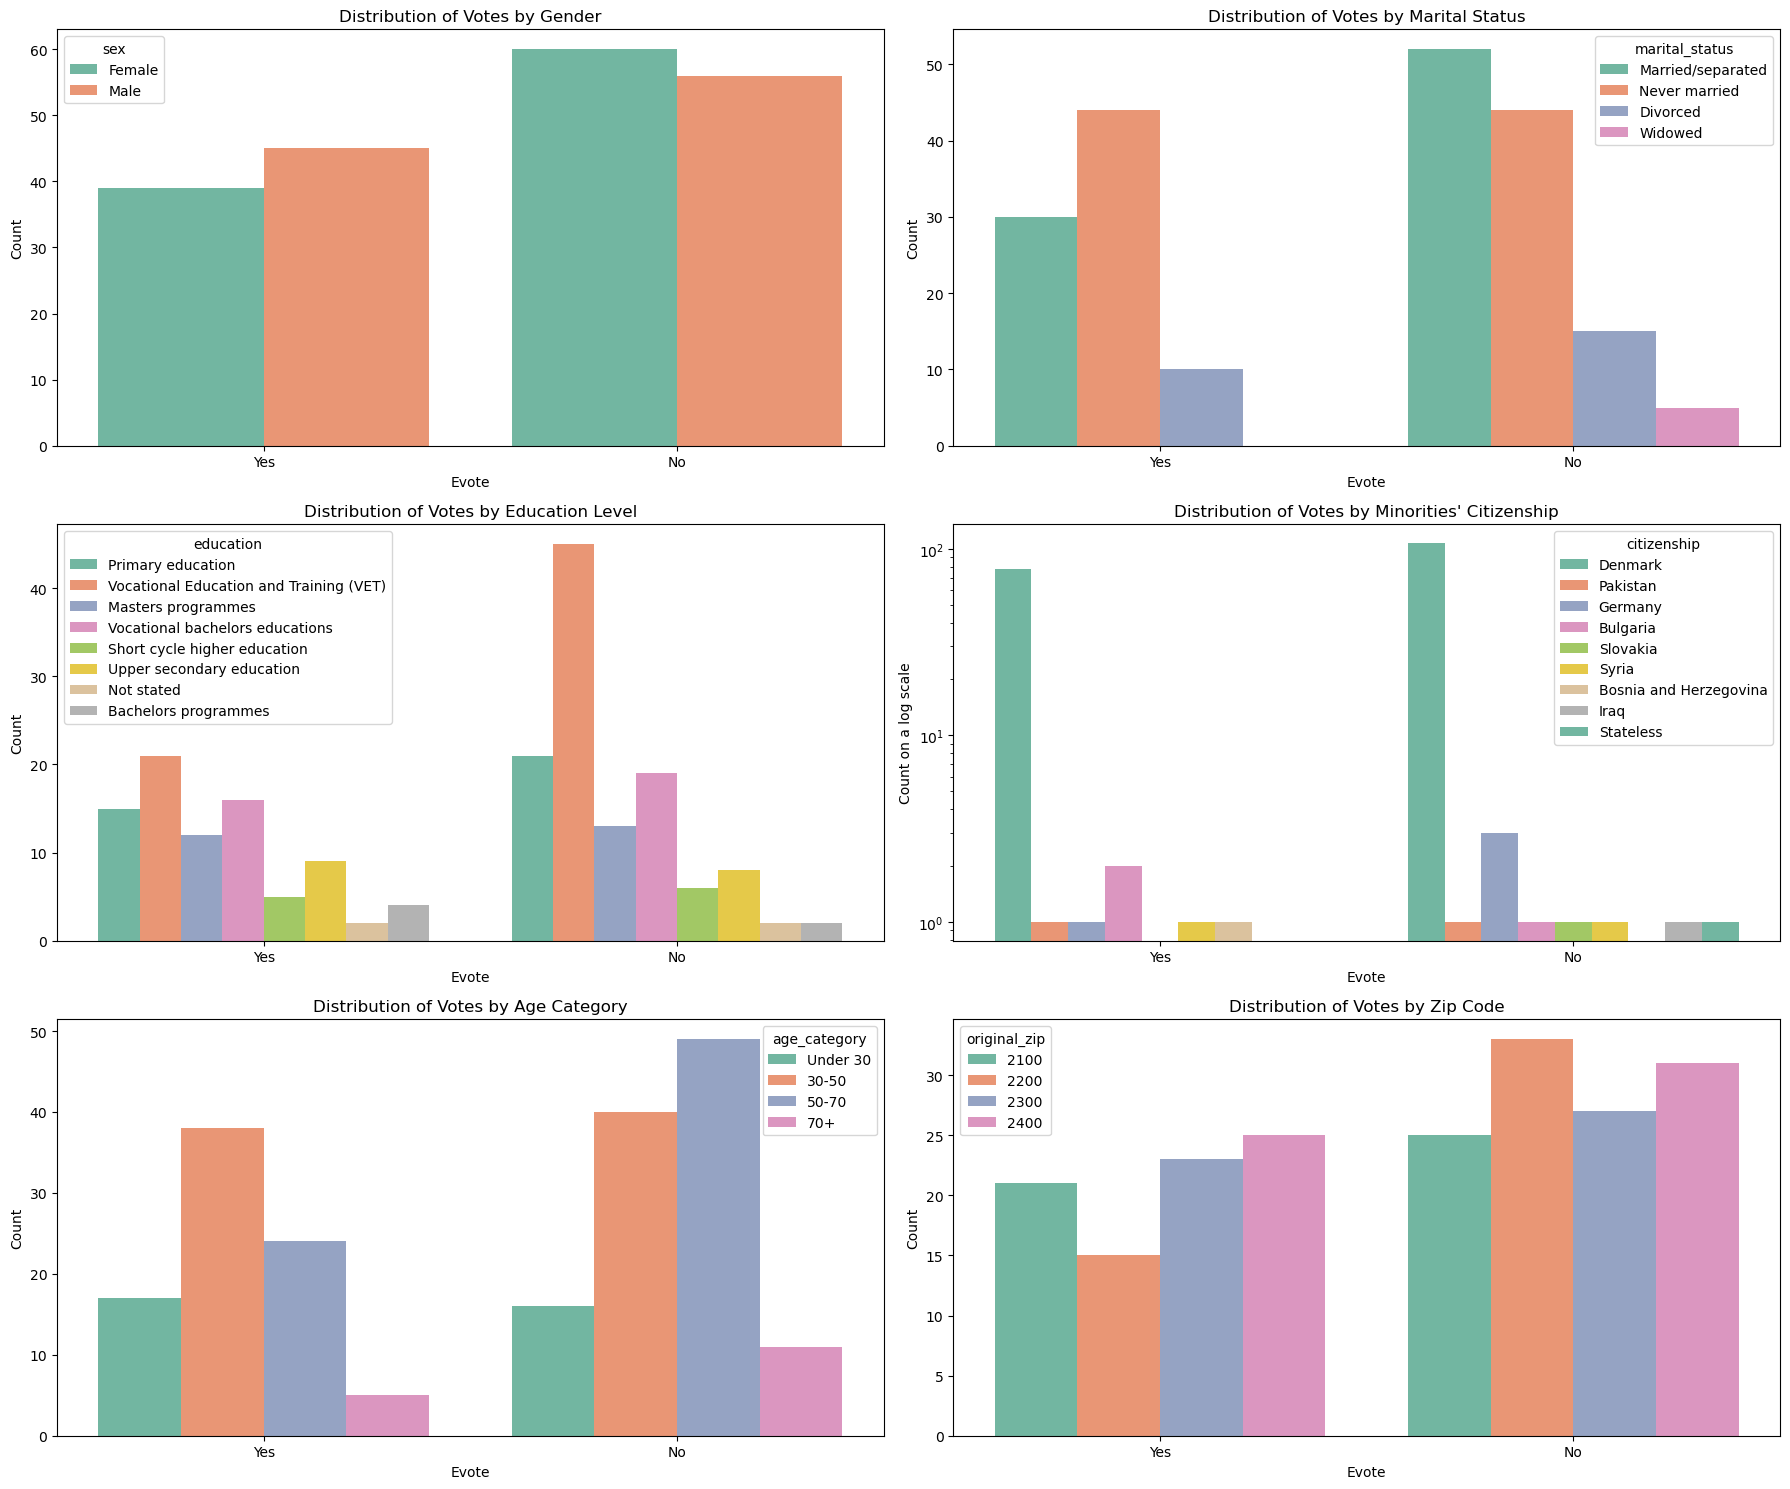

In [11]:
custom_palette = sns.color_palette("Set2")

df['evote'] = df['evote'].map({0: 'No', 1: 'Yes'})

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))  # 2x2 grid of subplots

# Plot: Distribution of Votes by Sex
sns.countplot(x='evote', hue='sex', data=df, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Votes by Gender')
axes[0, 0].set_xlabel('Evote')
axes[0, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Marital Status
sns.countplot(x='evote', hue='marital_status', hue_order=['Married/separated', 'Never married', 'Divorced', 'Widowed'], data=df, palette=custom_palette, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Votes by Marital Status')
axes[0, 1].set_xlabel('Evote')
axes[0, 1].set_ylabel('Count')

# Plot: Distribution of Votes by Education Level
sns.countplot(x='evote', hue='education', data=df, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Votes by Education Level')
axes[1, 0].set_xlabel('Evote')
axes[1, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Citizenship
sns.countplot(x='evote', hue='citizenship', data=df, palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Votes by Minorities\' Citizenship')
axes[1, 1].set_xlabel('Evote')
axes[1, 1].set_ylabel('Count on a log scale')
axes[1, 1].set_yscale('log')

# Plot: Distribution of Votes by Age Category
sns.countplot(x='evote', hue='age_category', hue_order=['Under 30', '30-50', '50-70', '70+'], data=df, palette=custom_palette, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Votes by Age Category')
axes[2, 0].set_xlabel('Evote')
axes[2, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Zip Code
sns.countplot(x='evote', hue='original_zip', data=df, palette=custom_palette, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Votes by Zip Code')
axes[2, 1].set_xlabel('Evote')
axes[2, 1].set_ylabel('Count')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [12]:
# Load the Excel file
file_path = 'datasets/private_dataF.xlsx'  # Update this path if necessary
df = pd.read_excel(file_path, engine='openpyxl')
# Load the Excel file
file_path = 'anonymized_dataF.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

df['age_category'] = df['age']
df['sex'] = df['sex_new']
df['marital_status'] = df['marital_status_new']
df['citizenship'] = df['danish_Status']

# Function to convert categorical data to numeric
def encode_categories(column):
    return pd.Categorical(df[column]).codes

# Encode categorical variables for statistical analysis
df['sex_encoded'] = encode_categories('sex')
df['party_encoded'] = encode_categories('party')
df['marital_status_encoded'] = encode_categories('marital_status')
df['education_encoded'] = encode_categories('education')
df['citizenship_encoded'] = encode_categories('citizenship')
df['age_category_encoded'] = encode_categories('age_category')

# ---- Chi-Square Tests for Categorical Variables ----
# Gender vs. Evote
contingency_table_sex_evote = pd.crosstab(df['sex'], df['evote'])
chi2_sex, p_value_sex_evote, _, _ = chi2_contingency(contingency_table_sex_evote)

# Marital Status vs. Evote
contingency_table_marital_evote = pd.crosstab(df['marital_status'], df['evote'])
chi2_marital, p_value_marital_evote, _, _ = chi2_contingency(contingency_table_marital_evote)

# Citizenship vs. Evote
contingency_table_citizenship_evote = pd.crosstab(df['citizenship'], df['evote'])
chi2_citizenship, p_value_citizenship_evote, _, _ = chi2_contingency(contingency_table_citizenship_evote)

# Education vs. Evote
contingency_table_education_evote = pd.crosstab(df['education'], df['evote'])
chi2_education, p_value_education_evote, _, _ = chi2_contingency(contingency_table_education_evote)

# Age Category vs. Evote
contingency_table_age_evote = pd.crosstab(df['age_category'], df['evote'])
chi2_age, p_value_age_evote, _, _ = chi2_contingency(contingency_table_age_evote)

# ---- Display Results ----
print("Chi-Square Test Results:")
print(f"Gender vs. Evote: Chi2 = {chi2_sex}, p-value = {p_value_sex_evote}")
print(f"Marital Status vs. Evote: Chi2 = {chi2_marital}, p-value = {p_value_marital_evote}")
print(f"Citizenship vs. Evote: Chi2 = {chi2_citizenship}, p-value = {p_value_citizenship_evote}")
print(f"Education vs. Evote: Chi2 = {chi2_education}, p-value = {p_value_education_evote}")
print(f"Age Category vs. Evote: Chi2 = {chi2_age}, p-value = {p_value_age_evote}")


Chi-Square Test Results:
Gender vs. Evote: Chi2 = 2.0525540620838285, p-value = 0.15195109576074667
Marital Status vs. Evote: Chi2 = 1.6612154605151916, p-value = 0.6455906248490908
Citizenship vs. Evote: Chi2 = 0.0, p-value = 1.0
Education vs. Evote: Chi2 = 5.871115426316816, p-value = 0.554876744850068
Age Category vs. Evote: Chi2 = 6.078360988020883, p-value = 0.10785941212346661


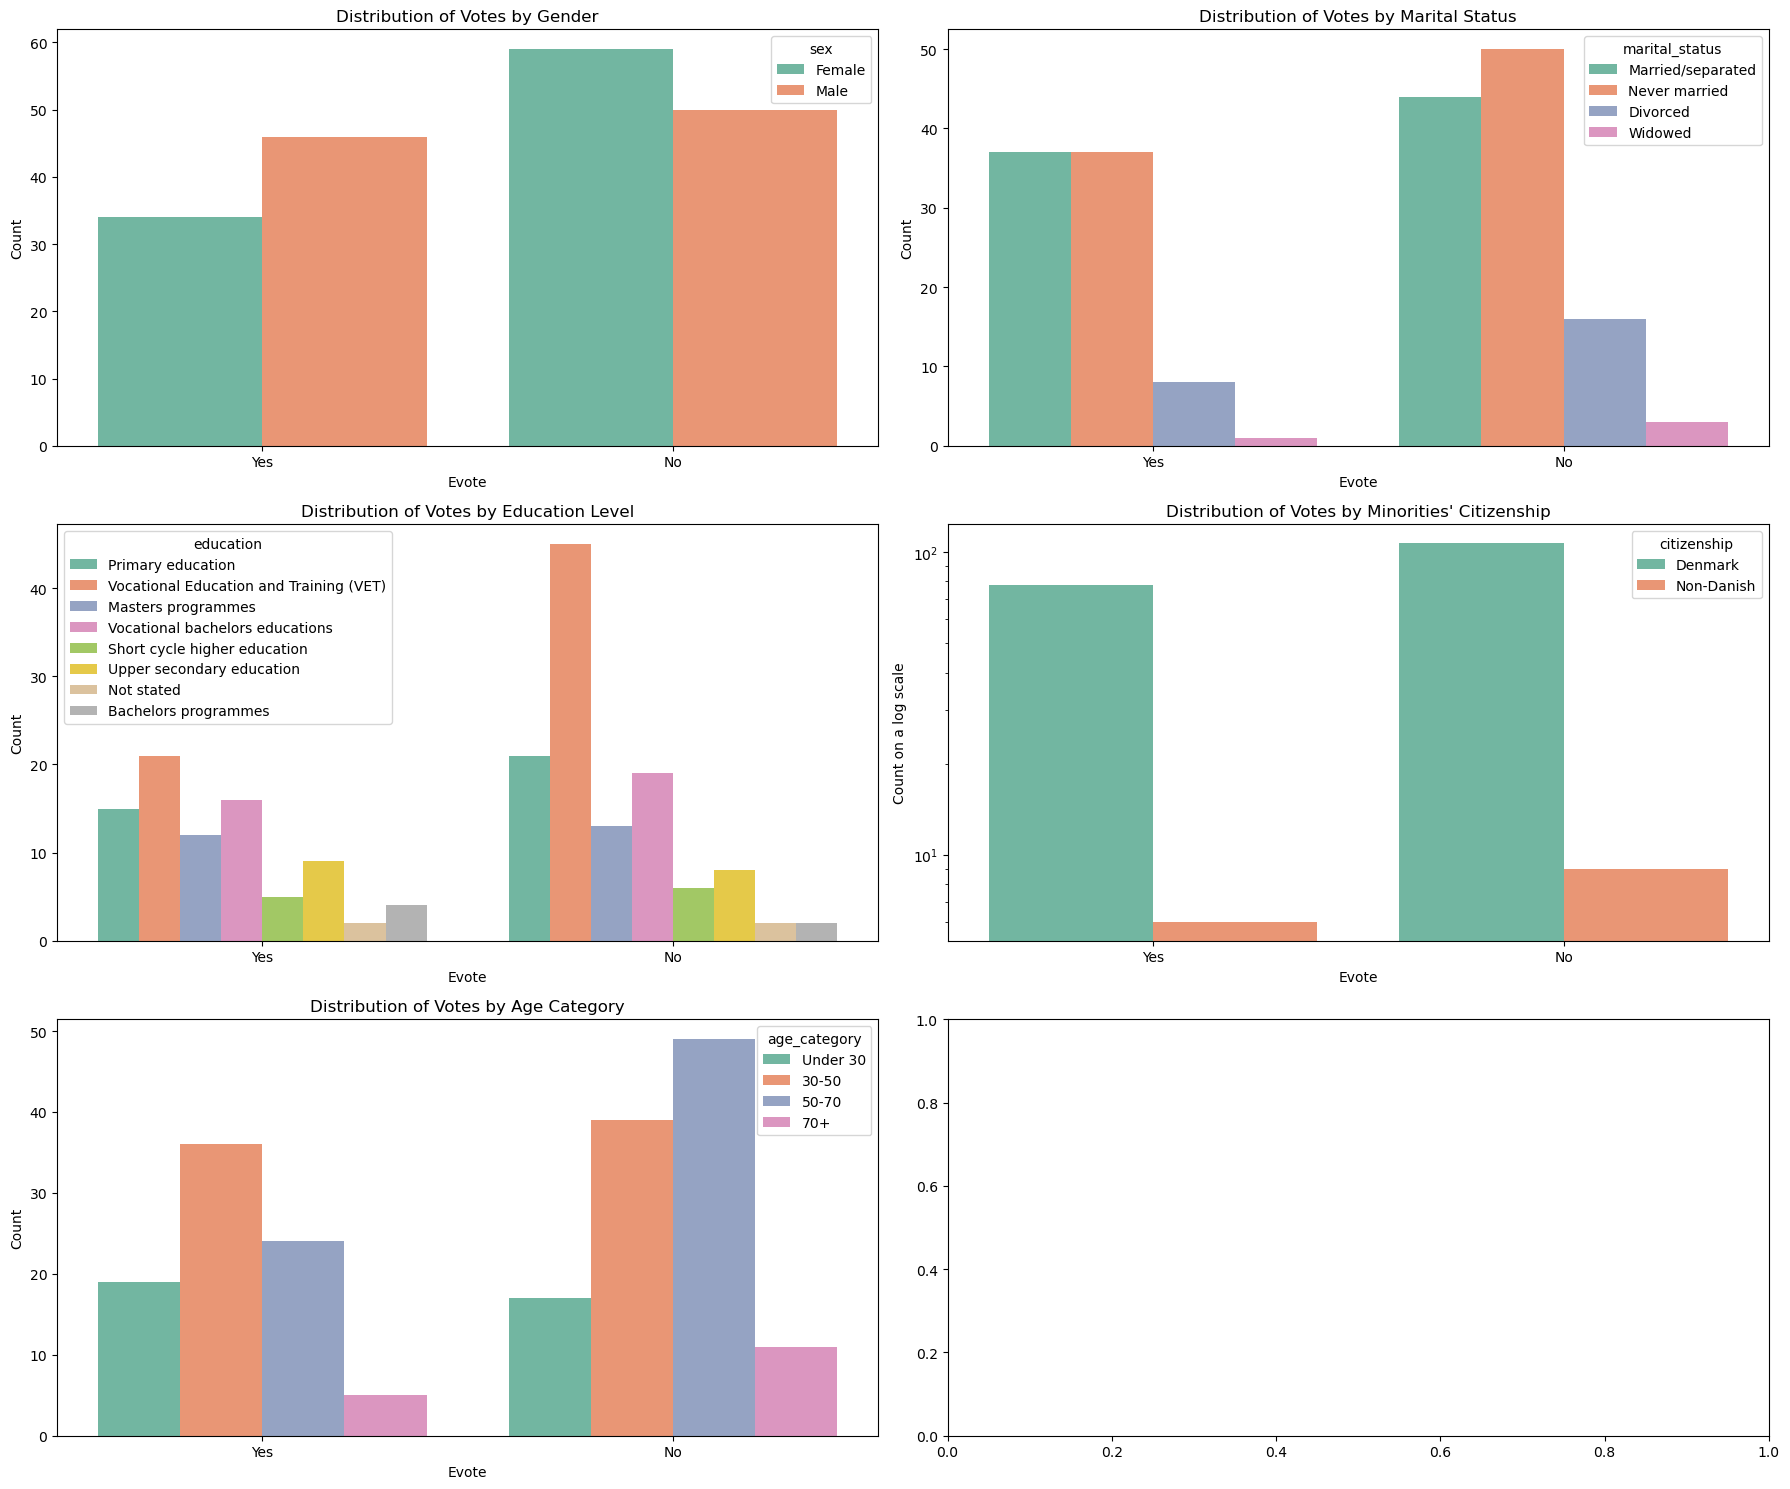

In [13]:
df['evote'] = df['evote'].map({0: 'No', 1: 'Yes'})

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 15))  # 2x2 grid of subplots

# Plot: Distribution of Votes by Sex
sns.countplot(x='evote', hue='sex',  hue_order=['Female', 'Male'], data=df, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Votes by Gender')
axes[0, 0].set_xlabel('Evote')
axes[0, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Marital Status
sns.countplot(x='evote', hue='marital_status', hue_order=['Married/separated', 'Never married', 'Divorced', 'Widowed'], data=df, palette=custom_palette, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Votes by Marital Status')
axes[0, 1].set_xlabel('Evote')
axes[0, 1].set_ylabel('Count')

# Plot: Distribution of Votes by Education Level
sns.countplot(x='evote', hue='education', data=df, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Votes by Education Level')
axes[1, 0].set_xlabel('Evote')
axes[1, 0].set_ylabel('Count')

# Plot: Distribution of Votes by Citizenship
sns.countplot(x='evote', hue='citizenship', data=df, palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Votes by Minorities\' Citizenship')
axes[1, 1].set_xlabel('Evote')
axes[1, 1].set_ylabel('Count on a log scale')
axes[1, 1].set_yscale('log')

# Plot: Distribution of Votes by Age Category
sns.countplot(x='evote', hue='age_category', hue_order=['Under 30', '30-50', '50-70', '70+'], data=df, palette=custom_palette, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Votes by Age Category')
axes[2, 0].set_xlabel('Evote')
axes[2, 0].set_ylabel('Count')

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()